## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
data = soup.find_all('tr', class_='data-row')

rows = []
for row in data:
    points = row.find_all('td')
    id = points[0].text.strip()
    date = points[1].text.strip()
    sol = points[2].text.strip()
    ls = points[3].text.strip()
    month = points[4].text.strip()
    min_temp = points[5].text.strip()
    pressure = points[6].text.strip()

    the_dict = {
        'id': id,
        'terrestrial_date': date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    }
    rows.append(the_dict)

In [6]:
mars_weather = pd.DataFrame(rows)
mars_weather.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# Examine data type of each column
mars_weather.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
mars_weather_df = mars_weather.astype({'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})

In [9]:
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

In [10]:
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# 1. How many months are there on Mars?
months = mars_weather_df['month'].value_counts().sort_index()
months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_weather_df['sol'].count()
martian_days

1867

In [14]:
# 3. What is the average low temperature by month?
avg_min_temps = mars_weather_df.groupby(['month'])['min_temp'].mean()
avg_min_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

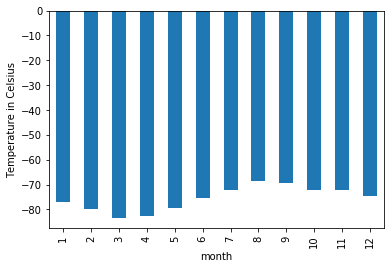

In [15]:
# Plot the average temperature by month
ax = avg_min_temps.plot.bar()
ax.set_ylabel('Temperature in Celsius')

Text(0, 0.5, 'Temperature in Celsius')

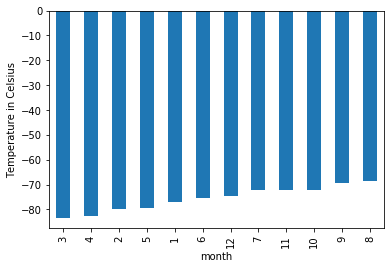

In [16]:
# Identify the coldest and hottest months in Curiosity's location
curiosity = avg_min_temps.sort_values()
ax = curiosity.plot.bar()
ax.set_ylabel('Temperature in Celsius')

In [17]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather_df.groupby(['month'])['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

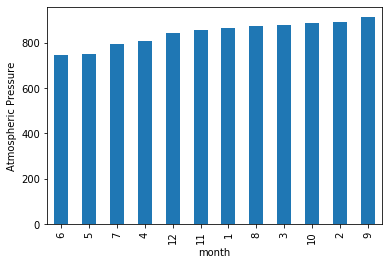

In [18]:
# Plot the average pressure by month
avg_pressure2 = avg_pressure.sort_values()
ax = avg_pressure2.plot.bar()
ax.set_ylabel('Atmospheric Pressure')

Text(0.5, 0, 'Number of Terrestrial Days')

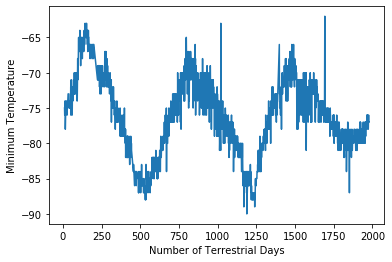

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year = mars_weather_df.groupby(['sol'])['min_temp'].mean()
ax = martian_year.plot()
ax.set_ylabel('Minimum Temperature')
ax.set_xlabel('Number of Terrestrial Days')

In [21]:
# Write the data to a CSV
mars_weather.to_csv("mars.csv", encoding='utf-8', index=False)

In [25]:
browser.quit()